# Lecture 3: Neural Network Learning Part 1

## Perceptron Learning:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

%matplotlib inline

### $$ \mathrm{Forward \ Propagation:} \ \sum_{i = 0}^{m} w_i x_i = v = \vec{w} \cdot \vec{x} $$
$$
\mathrm{Prediction:} \ \varphi(v) = \begin{cases} 
          1, & \mathrm{if} \ v\ge 0 \\
          0, & \mathrm{if} \ v < 0 
       \end{cases}
$$
$$
\mathrm{Train:} \ \Delta w = \eta(d_i - y_i)X_i \ \Longrightarrow \ w' = \Delta w + w
$$

#### $$ w_1x_1 + w_2x_2 + w_0 = 0 \ \Longrightarrow \ x_2 = \frac{-(w_1x_1 + w_0)}{w_2}$$

### Plot Functions:

In [2]:
# plot data points
def plot_fun(features, labels, classes):
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
        features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-1, 2, -1, 2])
    plt.title('Raw Data Plot For Both Classes')
    plt.xlabel('X: Feature 1')
    plt.ylabel('Y: Feature 2')
    plt.legend(['Class' + str(classes[0]), 'Class' + str(classes[1])])
    plt.show()

# plot separating line: w1x1 + w2x2 + w0 = 0
def plot_fun_thr(features, labels, thresholdParams, classes = [0, 1]):
    # plot data points
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
        features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-1, 2, -1, 2])
    # plot separating line
    x1 = np.linspace(-1, 2, 50)
    # w1x1 + w2x2 + w0 = 0 => x2 = -(w1x1 + w0) / w2
    x2 = -(thresholdParams[1] * x1 + thresholdParams[0]) / thresholdParams[2]
    plt.plot(x1, x2, '-b')
    plt.xlabel('X: Feature 1')
    plt.ylabel('Y: Feature 2')
    plt.legend(['Class' + str(classes[0]), 'Class' + str(classes[1])])
    #plt.pause(0.5)
    plt.show()

### Class Functions

In [3]:
class NeuralNetwork(object):

    def __init__(self, num_params=2):
        # Use seed to generate same weights each run
        # np.random.seed(1)
        # 3x1 Weight Matrix
        self.weight_matrix = 2 * np.random.random((num_params + 1, 1)) - 1 # random weights between -1 and 1
        # Learning Rate: 'eta'
        self.l_rate = 0.6

    # Hard Limiter as activation function (label data)
    def hard_limiter(self, x):
        outs = np.zeros(x.shape)
        outs[x >= 0] = 1 # iterate and determine class of each item
        return outs # Return Classified Data

    # forward propagation (calculate local field: v = w0 + w1x1 + w2x2 + ... + wmxm)
    def forward_propagation(self, inputs):
        # inputs: 1 x 3, weight_matrix: 3 x 1
        outs = np.dot(inputs, self.weight_matrix)
        return self.hard_limiter(outs)

    # Training Neural Network
    def train(self, train_inputs, train_outputs, num_train_iterations = 1000):
        # Number of iterations to perform in this input dataset
        for iteration in range(num_train_iterations): # Adjust weights for all inputs
            # Update the Perceptron based on misclassified examples
            for i in range(train_inputs.shape[0]):
                pred_i = self.pred(train_inputs[i, :])
                if pred_i != train_outputs[i]: # if misclassified data point (train outputs = d)
                    output = self.forward_propagation(train_inputs[i, :]) # output = y
                    # Calculate the error in the output
                    error = train_outputs[i] - output 
                    adjustment = self.l_rate * error * train_inputs[i] # adjustment = delta W
                    # Adjust the weight matrix
                    self.weight_matrix[:, 0] += adjustment
                    # Plot the separating line based on weights
            print('Iteration #' + str(iteration + 1))
            # Plot classifier lines
            plot_fun_thr(train_inputs[:, 1:3], train_outputs, self.weight_matrix[:, 0]) #, classes) <= OPTIONAL

    # predict classes of new data points (based on model)
    def pred(self, inputs):
        preds = self.forward_propagation(inputs)
        return preds

### Step 1: Initialize Weights & Plot Data

Features Vector Before Bias:
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 

[0 0 0 1] 



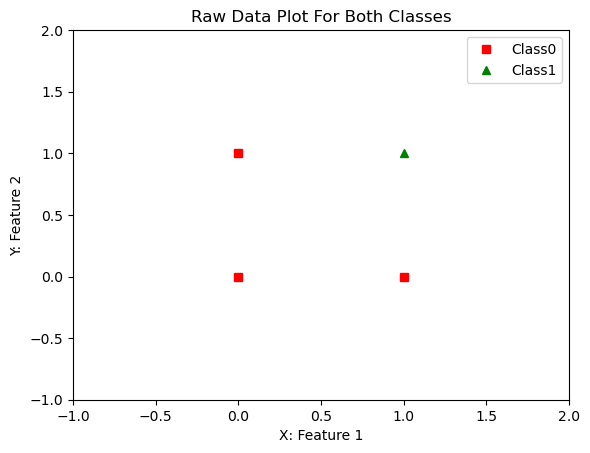

In [4]:
# if __name__ == "__main__":
# Truth Table for Logic AND function (inputs)
features = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print('Features Vector Before Bias:')
print(features, '\n')

# Labels (desired outputs) for Logic AND function
labels = np.array([0, 0, 0, 1])
print(labels, '\n')

classes = [0, 1]
plot_fun(features, labels, classes)

### Add Bias to Features Matrix:

In [5]:
# Create vector/matrix for bias = 1
bias = np.ones((features.shape[0], 1))

print(bias, '\n')
print(bias.shape, '\n')
# Append the previous features vector to the bias vector
features = np.append(bias, features, axis = 1) # Axis 1 = Columns

print('Features Vector After Adding Bias:')
print(features, '\n')
print(features.shape)

[[1.]
 [1.]
 [1.]
 [1.]] 

(4, 1) 

Features Vector After Adding Bias:
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]] 

(4, 3)


### Declare Object and Define Weights:

In [6]:
# Initialize Object & Weights:
neural_network = NeuralNetwork() # 2 feature parameters (default)

print('Random Weights Before Training:')
print(neural_network.weight_matrix)

Random Weights Before Training:
[[-0.39490202]
 [-0.53231812]
 [-0.90730758]]


### Train Model:

Iteration #1


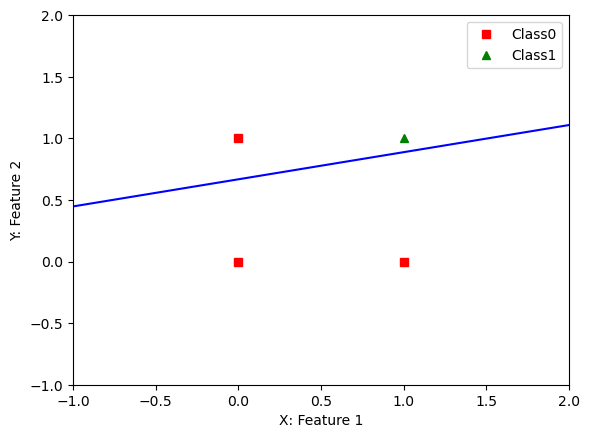

Iteration #2


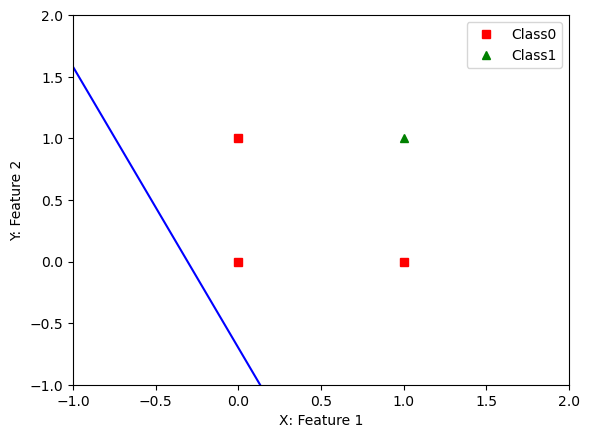

Iteration #3


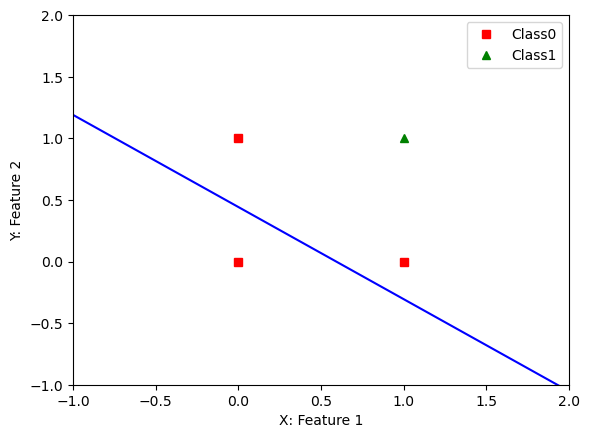

Iteration #4


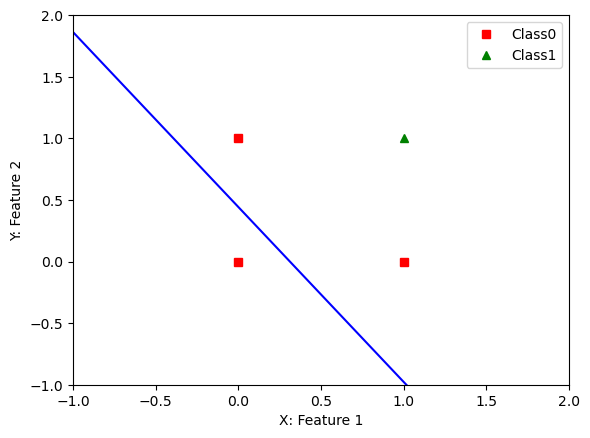

Iteration #5


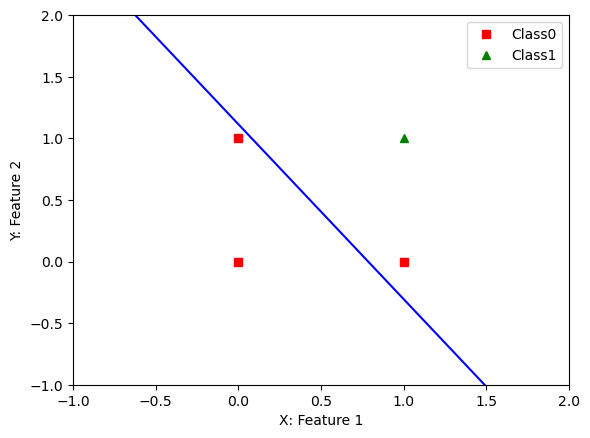

Iteration #6


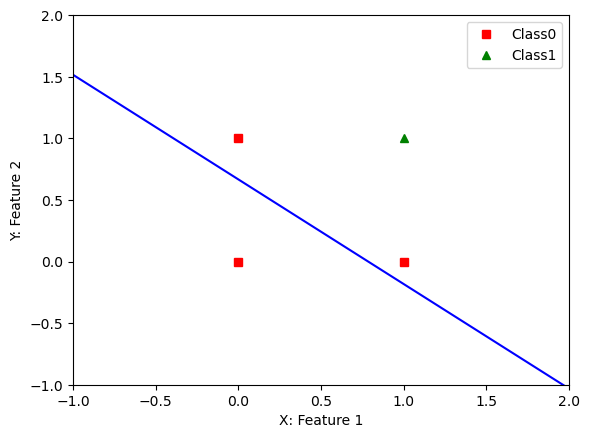

Iteration #7


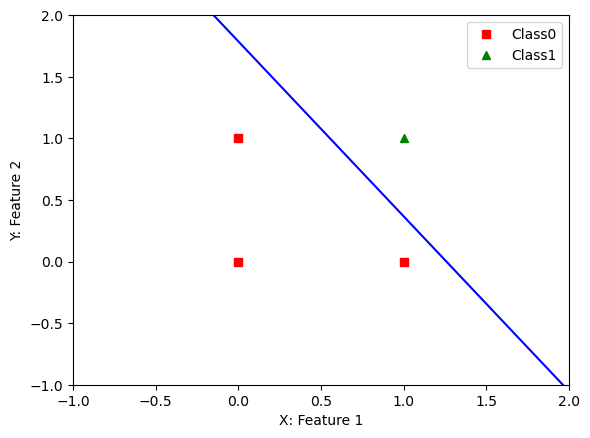

Iteration #8


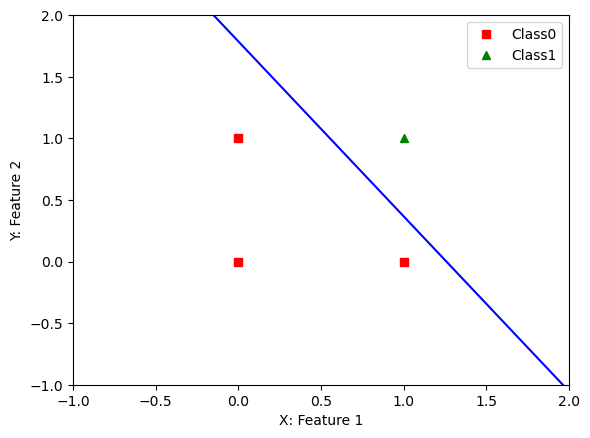

Iteration #9


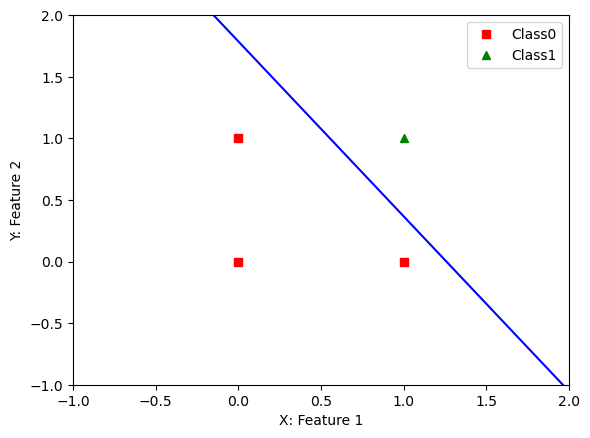

Iteration #10


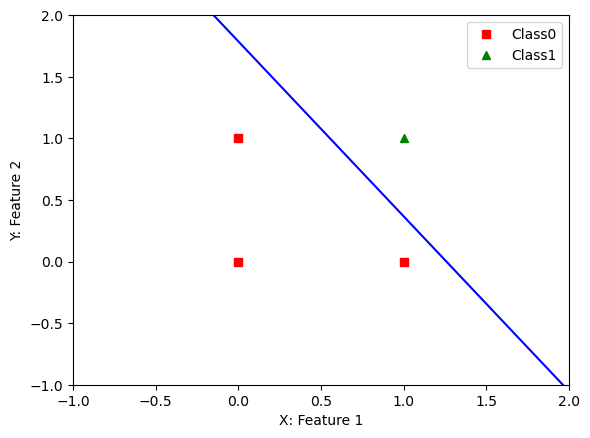

New Weights After Training
[[-1.59490202]
 [ 1.26768188]
 [ 0.89269242]]


In [7]:
# Train the model:
numIterations = 10
neural_network.train(features, labels, numIterations)

print('New Weights After Training')
print(neural_network.weight_matrix)

### Test Trained Perceptron With Data Points:

In [8]:
# Test neural network with training data points:
print('Testing network on training data points:')
print(neural_network.pred(features), '\n')

# Test neural network with a new data point
print('Testing network on new examples:')
print(neural_network.pred(np.array([1, 2, 2])))   # classify (2, 2)
print(neural_network.pred(np.array([1, 0, -1])))  # classify (0, -1)
print(neural_network.pred(np.array([1, -1, 0])))  # classify (-1, 0)
print(neural_network.pred(np.array([1, -1, -1]))) # classify (-1, -1)

Testing network on training data points:
[[0.]
 [0.]
 [0.]
 [1.]] 

Testing network on new examples:
[1.]
[0.]
[0.]
[0.]
